# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [30]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [31]:
iris = load_iris()

x = iris.data
y = iris.target

In [32]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [33]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2023)

## **sepal끼리, petal끼리**

In [34]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [35]:
S_X_tr = train_x.loc[:,['sepal length (cm)','sepal width (cm)']]
P_X_tr = train_x.loc[:,['petal length (cm)','petal width (cm)']]

In [46]:
S_X_te = test_x.loc[:,['sepal length (cm)','sepal width (cm)']]
P_X_te = test_x.loc[:,['petal length (cm)','petal width (cm)']]

In [36]:
S_X_tr.head()

,sepal length (cm),sepal width (cm)
9,4.9,3.1
38,4.4,3.0
18,5.7,3.8
119,6.0,2.2
98,5.1,2.5


In [37]:
P_X_tr.head()

,petal length (cm),petal width (cm)
9,1.5,0.1
38,1.3,0.2
18,1.7,0.3
119,5.0,1.5
98,3.0,1.1


In [38]:
S_X_tr.shape, P_X_tr.shape

((120, 2), (120, 2))

## One-hot Encoding

In [39]:
a = len(np.unique(train_y))

In [40]:
from tensorflow.keras.utils import to_categorical
train_y  = to_categorical(train_y, a)

## Modeling : multi-input & Add layer

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
tf.keras.backend.clear_session()

P_il = Input(shape=(2,))
P_hl1 = Dense(4, activation='relu')(P_il)

S_il = Input(shape=(2,))
S_hl1 = Dense(4, activation='relu')(S_il)

# add
add_l = tf.keras.layers.Add()([P_hl1,S_hl1])
ol = Dense(3, activation='softmax')(add_l)

model = Model([P_il,S_il], ol)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

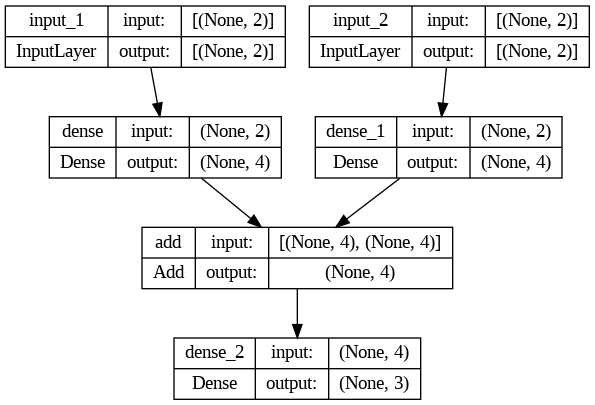

In [53]:
plot_model(model, show_shapes=True)

In [43]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [57]:
history = model.fit([S_X_tr, P_X_tr], train_y, callbacks=[es], epochs=1000, verbose=1, validation_split=0.15)

Epoch 1/1000
4/4 [==============================] - 0s 61ms/step - loss: 0.8734 - accuracy: 0.6961 - val_loss: 0.7546 - val_accuracy: 0.8333
Epoch 2/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.8692 - accuracy: 0.6961 - val_loss: 0.7515 - val_accuracy: 0.8333
Epoch 3/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.8653 - accuracy: 0.7059 - val_loss: 0.7479 - val_accuracy: 0.8333
Epoch 4/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.8618 - accuracy: 0.7059 - val_loss: 0.7439 - val_accuracy: 0.8333
Epoch 5/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.8581 - accuracy: 0.7157 - val_loss: 0.7407 - val_accuracy: 0.8333
Epoch 6/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.8540 - accuracy: 0.7157 - val_loss: 0.7384 - val_accuracy: 0.8333
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8503 - accuracy: 0.7157 - val_loss: 0.7359 - val_accuracy: 0.8889
Epoch 8/1000


## 모델 시각화

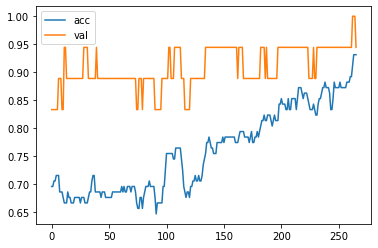

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val'])
plt.show()

## 학습 시켜보기!

In [59]:
from sklearn.metrics import *
y_pred = model.predict([S_X_te,P_X_te])
accuracy_score(test_y, y_pred.argmax(axis=1))

1/1 [==============================] - 0s 20ms/step


0.9666666666666667